In [3]:
import pickle as pkl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open('modelResults/linear_reg_predictions_df', 'rb') as file:
    linear_reg_predictions_df = pkl.load(file)
    
with open('modelResults/arima_predictions_df', 'rb') as file:
    arima_predictions_df = pkl.load(file)

            gold_Close  ARIMA_Predictions  gold_price_to_predict   
Date                                                               
2022-07-21  160.270004         158.072802                    NaN  \
2022-07-22  160.669998         160.372835             160.669998   
2022-07-23         NaN                NaN             160.229996   
2022-07-25  160.229996         160.624256                    NaN   
2022-07-26  160.039993         160.258148             160.039993   
...                ...                ...                    ...   
2024-08-26  232.759995         232.018679                    NaN   
2024-08-27  233.389999         232.644301             233.389999   
2024-08-28  231.750000         233.445277             231.750000   
2024-08-29  232.949997         231.721656             232.949997   
2024-08-30  231.289993         232.969671             231.289993   

            Linear_Reg_Predictions  
Date                                
2022-07-21                     NaN  
2022

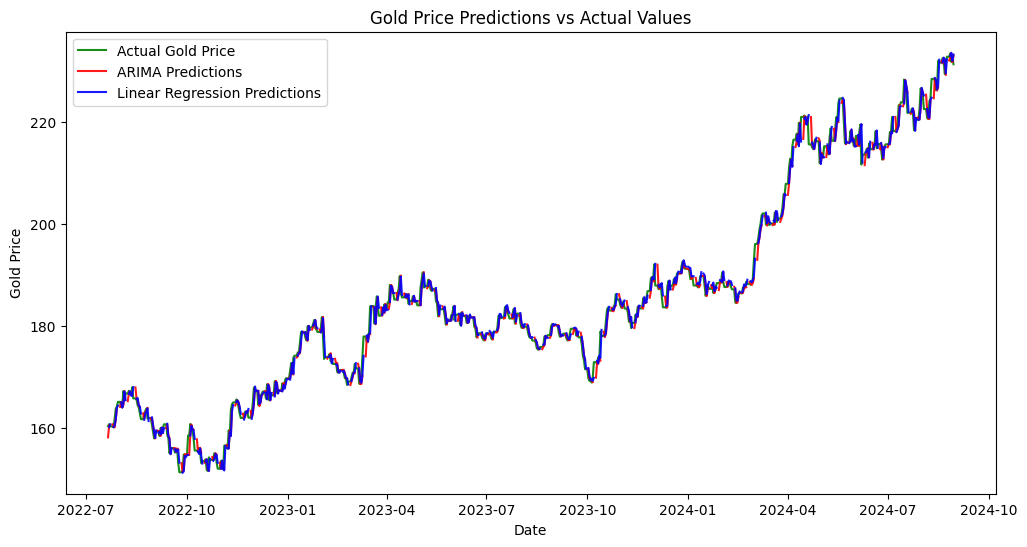

In [4]:
arima_predictions_df = arima_predictions_df.rename(columns={'Predictions': 'ARIMA_Predictions'})
linear_reg_predictions_df = linear_reg_predictions_df.rename(columns={'Predictions': 'Linear_Reg_Predictions'})
all_predictions = pd.concat([arima_predictions_df, linear_reg_predictions_df], axis=1)

# Print the combined DataFrame to verify
print(all_predictions)
all_predictions['gold_price_to_predict'] = all_predictions['gold_Close'].combine_first(all_predictions['gold_price_to_predict'])

# Plot
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(all_predictions.index, all_predictions['gold_price_to_predict'], label='Actual Gold Price', alpha=0.9,  color='green', linestyle='-')

# Plot ARIMA predictions
plt.plot(all_predictions.index, all_predictions['ARIMA_Predictions'], label='ARIMA Predictions', alpha=0.9, color='red', linestyle='-')

# Plot Linear Regression predictions
plt.plot(all_predictions.index, all_predictions['Linear_Reg_Predictions'], alpha=0.9, label='Linear Regression Predictions', color='blue', linestyle='-')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions vs Actual Values')
plt.legend()